In [445]:
%matplotlib inline

# Como funciona una red neuronal

Como hemos dicho una neurona es una unidad de procesamiento, recibe unas señales, realiza unos cálculos y saca otra señal.

![red_neuronal_artificial](Imagenes/red_neuronal_artificial.jpg)

Así que vamos a ver el ejemplo más sencillo, el caso en el que se recibe una señal y se saca otra, y lo vamos a ver con la regresión lineal

Supongamos que hemos hecho unas medidas y obtenemos los siguientes puntos

In [446]:
# import numpy as np

# x = np.linspace(0, 10, 30)
# rand = np.random.randn(*x.shape)
# y = 2*(x + rand)

In [447]:
import numpy as np

x = np.array( [ 0.        ,  0.34482759,  0.68965517,  1.03448276,  1.37931034,
        1.72413793,  2.06896552,  2.4137931 ,  2.75862069,  3.10344828,
        3.44827586,  3.79310345,  4.13793103,  4.48275862,  4.82758621,
        5.17241379,  5.51724138,  5.86206897,  6.20689655,  6.55172414,
        6.89655172,  7.24137931,  7.5862069 ,  7.93103448,  8.27586207,
        8.62068966,  8.96551724,  9.31034483,  9.65517241, 10.        ])

y = np.array( [-0.16281253,  1.88707606,  0.39649312,  0.03857752,  4.0148778 ,
        0.58866234,  3.35711859,  1.94314906,  6.96106424,  5.89792585,
        8.47226615,  3.67698542, 12.05958678,  9.85234481,  9.82181679,
        6.07652248, 14.17536744, 12.67825433, 12.97499286, 11.76098542,
       12.7843083 , 16.42241036, 13.67913705, 15.55066478, 17.45979602,
       16.41982806, 17.01977617, 20.28151197, 19.38148414, 19.41029831])

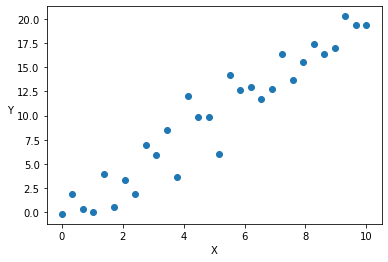

In [448]:
import matplotlib.pyplot as plt

plt.scatter(x, y)
plt.xlabel('X')
plt.ylabel('Y  ', rotation=0)
plt.show()

Como vemos esto se puede asemejar a una regresión lineal. Es decir, podemos suponer que la neurona, recibe ```x```, lo multiplica por un número y saca ```y```

![red neuronal regresion](Imagenes/red_neuronal_regresion.png)

A partir de aquí vamos a mostrar cómo funcionan las redes neuronales, solo que con un ejemplo sencillo de una sola neurona, luego iremos mostrando ejemplos cada vez más complejos, hasta que explicaremos el funcionamiento general de las redes neuronales. Pero si entiendes lo que va a pasar a continuación vas a entender las redes neuronales

Nuestra neurona tiene el parámetro ```a```, que es el que queremos cambiar para que la recta que va a generar se asemeje lo máximo posible a los puntos. El proceso de aprendizaje de nuestra neurona va a consistir en mediante unos cuantos cálculos determinar el mejor valor posible de ```a```

## Inicialización aleatoria del parámetro

Este ejemplo es sencillo, pero cuando tenemos redes neuronales complejas y no sabemos qué valores tienen que tener sus parámetros, lo que se hace es inicializarlos aleatoriamente

In [449]:
import random

random.seed(45) # Esto es una semilla, cuando se generan números aleatorios, 
                # pero queremos que siempre se genere el mismo se suele fijar
                # un número llamado semilla. Esto hace que siempre a sea el mismo

a = random.random()
a

0.2718754143840908

El valor de a es 0.271875, veamos qué recta saldría si parásemos ahora

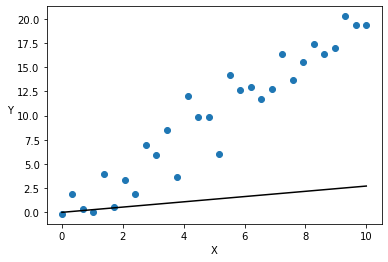

In [450]:
z = a*x

plt.scatter(x, y)
plt.plot(x, z, 'k')
plt.xlabel('X')
plt.ylabel('Y  ', rotation=0)
plt.show()

Como vemos no se parece en nada, así que vamos a tener que hacer que nuestra neurona *aprenda*

## Cálculo del error o loss

Para buscar el mejor valor posible de ```a``` queremos encontrar un valor que haga que los valores predichos por nuestra neurona tengan el menor error posible con los valores reales de ```y```

En este tipo de problemas se suele utilizar el [error cuadrático medio (ECM)](https://es.wikipedia.org/wiki/Error_cuadr%C3%A1tico_medio) o [mean squared error (MSE)](https://en.wikipedia.org/wiki/Mean_squared_error) en inglés. Hay muchas más funciones de error, pero de momento no vienen al caso, así que quédate con esta y ya aprenderemos más funciones más adelante

En la literatura a este error se le suele llamar función de pérdida o loss function, por lo que a partir de ahora lo llamaremos así

El error cuadrático medio (ECM) mide la distancia entre los puntos predichos por nuestra neurona y los valores reales de ```y```, de ahí la palabra *error* dentro de su nombre

$$\left(z-y\right)$$

![mean squared error](Imagenes/mean_squared_error.png)

Sin embargo a veces esa distancia va a ser positiva y a veces negativa, según si se toma primero el valor predicho por nuestra neurona o el valor de ```y```, por lo que dicha distancia se eleva al cuadrado, de ahí la palabrea *cuadrático* del nombre

$$\left(z-y\right)^2$$

Por último se suman todas las distancias elevadas al cuadrado y se divide entre el número de muestras, vamos, lo que es hacer una media de toda la vida, de ahí la palabra *medio* del nombre

$$loss = \frac{\sum_{i=1}^{N} \left(z-y\right)^2}{N}$$

Ya tenemos la manera de calcular el ECM (error cuadrático medio)

En nuestro caso nuestra pérdida es

In [451]:
def loss(y, z):
    n = len(y)
    sum = 0

    for i in range(n):
        sum += (z[i]-y[i])**2
    
    return sum/n

In [452]:
error = loss(y, z)
error

103.72263739946469

Aunque esto no nos dice mucho, veamos cómo cambia la función de pérdida (loss) en función del valor de ```a```

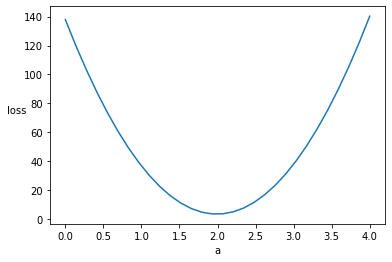

In [453]:
posibles_a = np.linspace(0, 4, 30)
perdidas = np.empty_like(posibles_a)

for i in range (30):
    z = posibles_a[i]*x
    perdidas[i] = loss(y, z)

plt.plot(posibles_a, perdidas)
plt.xlabel('a')
plt.ylabel('loss  ', rotation=0)
plt.show()

Podemos ver que el error o pérdida es menor cuando ```a``` vale en torno a 2. Podrías pensar, ya está, problema solucionado, y es cierto. Pero como te dije íbamos a empezar con el problemas más sencillo, por lo que mirando una gráfica lo podemos solucionar.

Si el problema tuviese 2 parámetros podríamos revisar un gráfico de 3 dimensiones para buscar el mínimo

![grafico 3 diemnsiones](Imagenes/matplotlib_3d.jfif)

Pero en cuanto nuestro problema tuviese más de 2 parámetros ya no podríamos buscar el minimo error con una gráfica. Por no decir que las redes neuronales tienen millones de parámetros, por ejemplo, la red neuronal resnet18 (que más tarde la estudiaremos) es una red pequeña y tiene en torno a 11 millones de parámetros. Es imposible buscar el mínimo error ahí de manera manual. De modo que necesitamos un método automático mediante cálculos

## Descenso del gradiente

Como hemos dicho, necesitamos encontrar el valor de ```a``` que haga que la función de pérdida sea mínima y a su vez hacerlo mediante un algoritmo.

Una de las peculiaridades de un mínimo de una función es que su gradiente o derivada es 0

Si no sabes lo que es la derivada o gradiente, es la recta que corta a una función en un punto de manera perpendicular

![derivada](Imagenes/derivada.png)

Por ejemplo, en esta imagen, la derivada de A, B y C son las lineas verde, azul y negra respectivamente

La derivada mide la pendiente de una función, cuanto más pendiente tiene la función en un punto, más perpendicular al *eje x* será la derivada en ese punto y cuanto menos pendiente tiene la función en un punto, más paralela al *eje x* será la derivada en ese punto

Pues bien, si volvemos a ver la gráfica de la función de pérdida con respecto el valor de a, cuanto mayor pendiente tenga la función, es decir, cuanto mayor sea la derivada, más lejos estaremos del mínimo. Y cuanto menor sea la derivada, menor pendiente, más cerca estaremos del mínimo

In [454]:
def gradiente (a, x, y):
    n = len(y)
    sum = 0

    for i in range(n):
        sum += (a*x[i]-y[i])*x[i]
    
    return 2*sum/n

In [455]:
def gradiente_linea (i):
    x1 = posibles_a[i]-0.7
    x2 = posibles_a[i]
    x3 = posibles_a[i]+0.7

    b = perdidas[i] - gradientes[i]*posibles_a[i]

    y1 = gradientes[i]*x1 + b
    y2 = perdidas[i]
    y3 = gradientes[i]*x3 + b

    x_linea = np.array([x1, x2, x3])
    y_linea = np.array([y1, y2, y3])

    return x_linea, y_linea

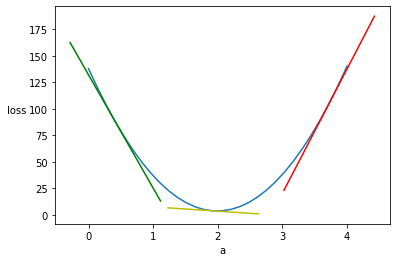

In [456]:
posibles_a = np.linspace(0, 4, 30)
perdidas = np.empty_like(posibles_a)
gradientes = np.empty_like(posibles_a)

for i in range (30):
    z = posibles_a[i]*x
    perdidas[i] = loss(y, z)
    gradientes[i] = gradiente(posibles_a[i], x, y)

# Se calcula la linea del gradiente en el inicio
i = 3
x_inicio, y_inicio = gradiente_linea(i)

# Se calcula la linea del gradiente en la base
i = 14
x_base, y_base = gradiente_linea (i)

# Se calcula la linea del gradiente al final
i = -3
x_final, y_final = gradiente_linea (i)


plt.plot(posibles_a, perdidas)
plt.plot(x_inicio, y_inicio, 'g')
plt.plot(x_base, y_base, 'y')
plt.plot(x_final, y_final, 'r')
# plt.scatter(posibles_a, gradientes)
plt.xlabel('a')
plt.ylabel('loss     ', rotation=0)
plt.show()